In [ ]:
from google.colab import files
uploaded = files.upload()


Saving HR_comma_sep.csv to HR_comma_sep (3).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import zscore

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['HR_comma_sep.csv']))
print(df.shape)
df.head(10)

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departmennt,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
5,0.41,0.50,2,153,3,0,0,sales,low,1
6,0.10,0.77,6,247,4,0,0,sales,low,1
7,0.92,0.85,5,259,5,0,0,sales,low,1
8,0.89,1.00,5,224,5,0,0,sales,low,1
9,0.42,0.53,2,142,3,0,0,sales,low,1


**1.	Exploratory Data Analysis (EDA)**

In [ ]:
df.rename(columns={'average_montly_hours':'average_monthly_hours','departmennt':'department'},inplace=True)
df.count()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_monthly_hours    14999
time_spend_company       14999
Work_accident            14999
promotion_last_5years    14999
department               14999
salary                   14999
left                     14999
dtype: int64

In [ ]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

In [ ]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

In [ ]:
#To check for any spelling errors or anomalous entries in our categorical variables we see the unique values present in each column.
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
#For seeing statistical attributes of categorical variables, we use the value counts command.
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [ ]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Text(0.5, 1.0, 'Number of employees in each Department')

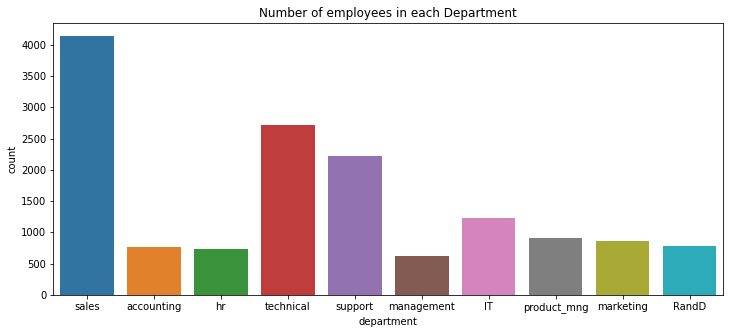

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(x="department", data=df)
ax.set_title('Number of employees in each Department')

Text(0.5, 1.0, 'Number of people in each Category of Salary')

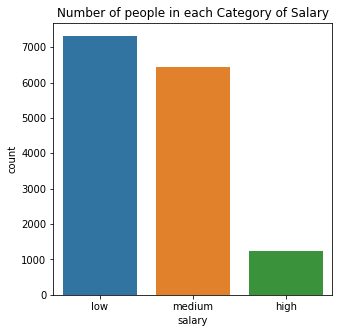

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x="salary", data=df)
ax.set_title('Number of people in each Category of Salary')

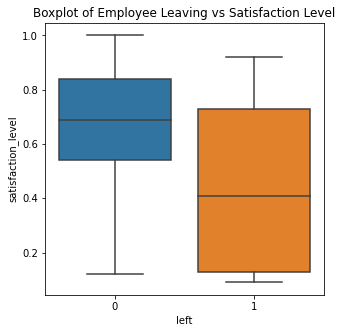

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='left', y='satisfaction_level', data=df)
ax.set_title('Boxplot of Employee Leaving vs Satisfaction Level')
plt.show()

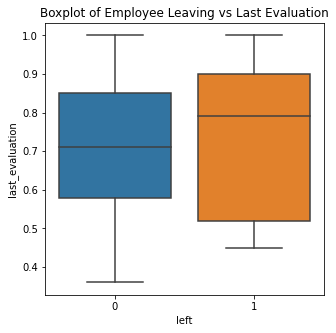

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='left', y='last_evaluation', data=df)
ax.set_title('Boxplot of Employee Leaving vs Last Evaluation')
plt.show()

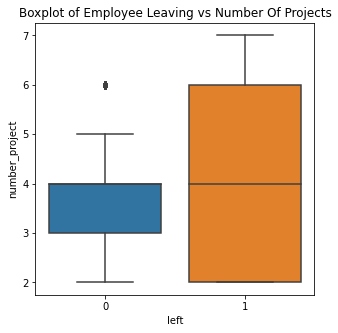

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='left', y='number_project', data=df)
ax.set_title('Boxplot of Employee Leaving vs Number Of Projects')
plt.show()

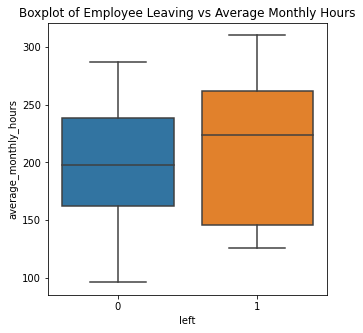

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='left', y='average_monthly_hours', data=df)
ax.set_title('Boxplot of Employee Leaving vs Average Monthly Hours')
plt.show()

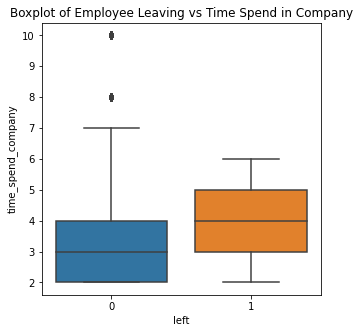

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.boxplot(x='left', y='time_spend_company', data=df)
ax.set_title('Boxplot of Employee Leaving vs Time Spend in Company')
plt.show()

Text(0.5, 1.0, 'Mean number of employees leaving vs Salary')

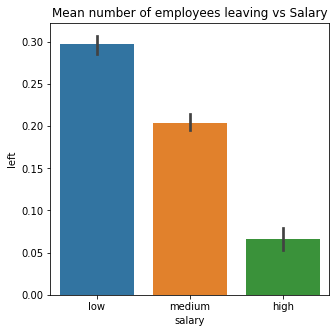

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.barplot(x="salary", y="left", data=df)
ax.set_title('Mean number of employees leaving vs Salary')

Text(0.5, 1.0, 'Mean number of employees leaving in each department')

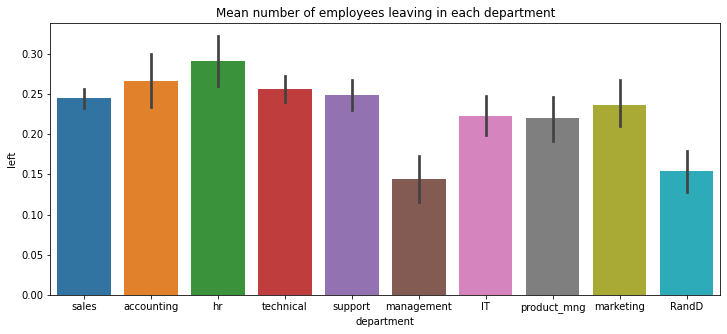

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x="department", y="left", data=df)
ax.set_title('Mean number of employees leaving in each department')

Text(0.5, 1.0, 'Mean satisfaction level of employees in each department')

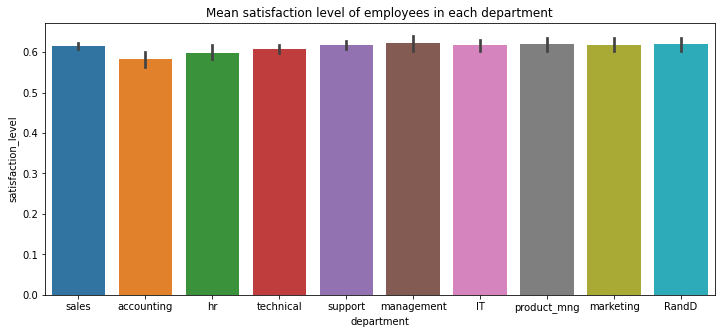

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x="department", y="satisfaction_level", data=df)
ax.set_title('Mean satisfaction level of employees in each department')

Text(0.5, 1.0, 'Mean Last evaluation of employees in each department')

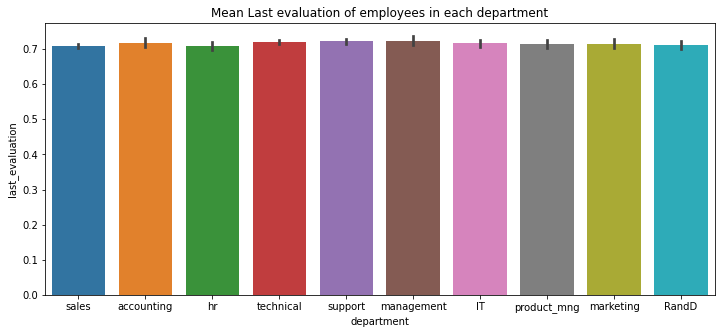

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x="department", y="last_evaluation", data=df)
ax.set_title('Mean Last evaluation of employees in each department')

In [ ]:
cor = df.corr()
cor

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


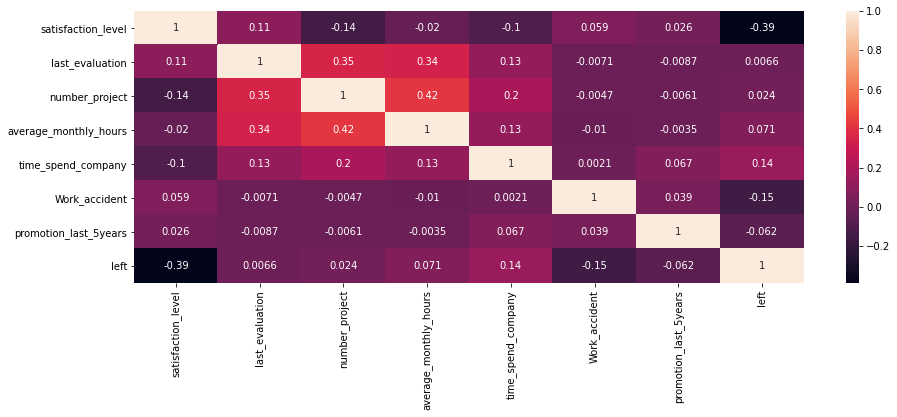

In [ ]:
plt.figure(figsize=(15, 5))
sns.heatmap(cor, annot=True)

Text(0.5, 1.0, 'Mean satisfaction level of employees who left')

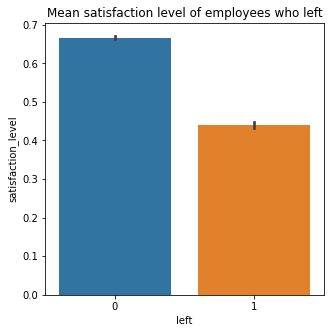

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.barplot(x="left", y="satisfaction_level", data=df)
ax.set_title('Mean satisfaction level of employees who left')

In [ ]:
#For seeing the relationship of categorical variables with other numerical variables we create dummies for the categorical variables.
dummies_department = pd.get_dummies(df['department'], prefix= 'Department')
dummies_salary = pd.get_dummies(df['salary'], prefix= 'Salary')
dummies_department.astype('int64')
dummies_salary.astype('int64')

df_new= pd.concat([df,dummies_department,dummies_salary],axis=1)
new_cor = df_new.corr()

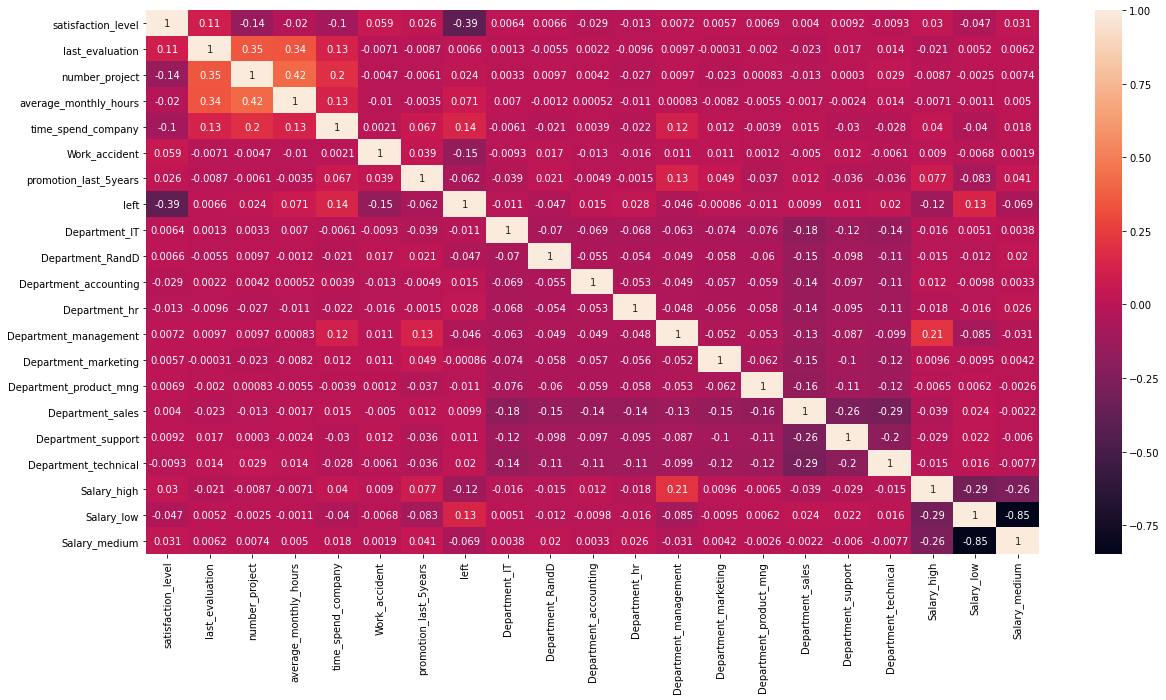

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(new_cor, annot=True)

**2.	Cluster and outlier Analysis**

In [ ]:
replace_dict = {"salary": {"low": 1, "medium": 2, "high": 3}}
df.replace(replace_dict, inplace=True)


Text(0.5, 1.0, 'Mean salary of employees in each department')

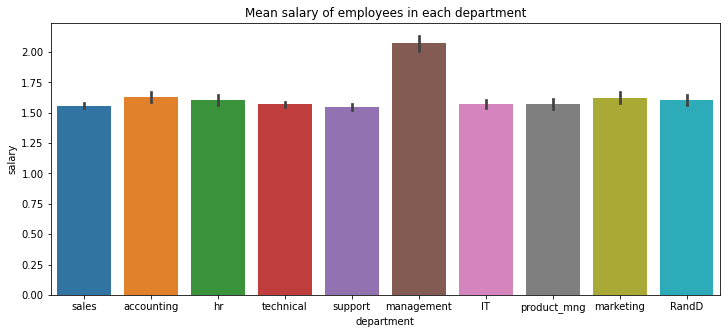

In [ ]:
plt.figure(figsize=(12, 5))
ax = sns.barplot(x="department", y="salary", data=df)
ax.set_title('Mean salary of employees in each department')

In [ ]:
df.drop("department", axis=1, inplace=True)

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,1,1
1,0.80,0.86,5,262,6,0,0,2,1
2,0.11,0.88,7,272,4,0,0,2,1
3,0.72,0.87,5,223,5,0,0,1,1
4,0.37,0.52,2,159,3,0,0,1,1


In [ ]:
normalizedX = StandardScaler().fit_transform(df)

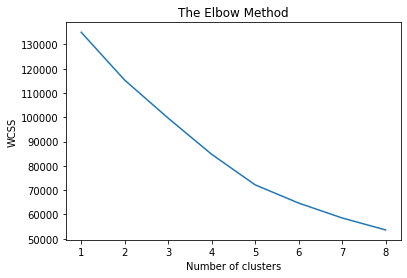

In [ ]:
wcss = []
for i in range(1,9):
	kmeans = KMeans(n_clusters = i, init ='k-means++', n_init = 12)
	kmeans.fit(normalizedX)
	wcss.append(kmeans.inertia_)
plt.plot(range(1,9), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
k_means = KMeans(init="k-means++", n_clusters=5, n_init=12)
k_means.fit(normalizedX)
labels = k_means.labels_

In [ ]:
df["Labels"] = labels
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,Labels
0,0.38,0.53,2,157,3,0,0,1,1,1
1,0.80,0.86,5,262,6,0,0,2,1,2
2,0.11,0.88,7,272,4,0,0,2,1,2
3,0.72,0.87,5,223,5,0,0,1,1,2
4,0.37,0.52,2,159,3,0,0,1,1,1


In [ ]:
df.groupby('Labels').mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
Labels,,,,,,,,,
0,0.656019,0.706019,3.752351,199.849530,4.166144,0.238245,1.0,2.018809,0.059561
1,0.411061,0.513900,2.102222,145.033889,3.075556,0.038889,0.0,1.422222,0.886667
2,0.438778,0.865806,5.245636,252.886534,4.972153,0.022860,0.0,1.466334,0.788861
3,0.690569,0.717131,3.756642,198.675406,3.151658,0.000000,0.0,1.648483,0.001999
4,0.667190,0.715203,3.803862,199.371443,3.472561,1.000000,0.0,1.608232,0.020833


In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,Labels
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,1.594706,0.238083,2.666978
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.637183,0.425924,0.923156
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,2.000000,0.000000,3.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,3.000000,1.000000,4.000000


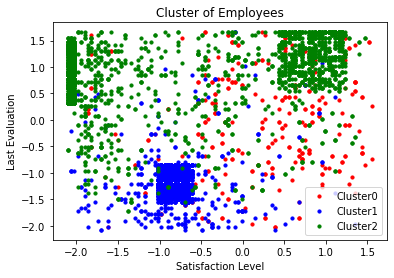

In [ ]:
plt.scatter(normalizedX[labels == 0,0],normalizedX[labels == 0,1],s = 10, c ='red',label = 'Cluster0')
plt.scatter(normalizedX[labels == 1,0],normalizedX[labels == 1,1],s = 10, c ='blue',label = 'Cluster1')
plt.scatter(normalizedX[labels == 2,0],normalizedX[labels == 2,1],s = 10, c ='green',label = 'Cluster2')
plt.title('Cluster of Employees')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.legend()
plt.show()

In [ ]:
satisfaction_level_zscore = np.abs(zscore(df["satisfaction_level"]))
satisfaction_level_df = df.loc[:, ["satisfaction_level"]]
satisfaction_level_df["z value"] = satisfaction_level_zscore
satisfaction_level_df[satisfaction_level_df["z value"] > 3]

,satisfaction_level,z value


In [ ]:
last_evaluation_zscore = np.abs(zscore(df["last_evaluation"]))
last_evaluation_df = df.loc[:, ["last_evaluation"]]
last_evaluation_df["z value"] = last_evaluation_zscore
last_evaluation_df[last_evaluation_df["z value"] > 3]

,last_evaluation,z value


In [ ]:
number_project_zscore = np.abs(zscore(df["number_project"]))
number_project_df = df.loc[:, ["number_project"]]
number_project_df["z value"] = number_project_zscore
number_project_df[number_project_df["z value"] > 3]

,number_project,z value


In [ ]:
avg_monthly_zscore = np.abs(zscore(df["average_monthly_hours"]))
avg_monthly_df = df.loc[:, ["average_monthly_hours"]]
avg_monthly_df["z value"] = avg_monthly_zscore
avg_monthly_df[avg_monthly_df["z value"] > 3]

,average_monthly_hours,z value


In [ ]:
time_spend_zscore = np.abs(zscore(df["time_spend_company"]))
time_spend_df = df.loc[:, ["time_spend_company"]]
time_spend_df["z value"] = time_spend_zscore
time_spend_df[time_spend_df["z value"] > 3]

,time_spend_company,z value
11007,8,3.083217
11008,8,3.083217
11009,8,3.083217
11010,8,3.083217
11011,8,3.083217
...,...,...
14205,10,4.452998
14206,10,4.452998
14207,10,4.452998
14208,10,4.452998
